In [22]:
import numpy as np
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm

$$
Q(s, a) := Q(s, a) + α [R + γ max_{a'} Q(s', a') - Q(s, a)] 
$$

In [23]:
# Create environment
map_size = 4
env = gym.make(
    'FrozenLake-v1', 
    is_slippery=False,
    desc=generate_random_map(
        size=map_size, 
        p=0.9, 
        seed=42
    )
)
state_size = env.observation_space.n
action_size = env.action_space.n

In [24]:
# Initialize Q-table
q_table = np.zeros((state_size, action_size))

In [25]:
# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995
epsilon_min = 0.01
episodes = 10000

In [26]:
# Training
rewards = []
for episode in tqdm(range(episodes)):
    state, _ = env.reset()
    state = int(state)
    done = False
    total_reward = 0
    
    while not done:
        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit
        
        # Take action
        next_state, reward, done, _, _ = env.step(action)
        next_state = int(next_state)
        
        # Q-learning update
        best_next_action = np.argmax(q_table[next_state])
        q_table[state, action] += alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])
        
        state = next_state
        total_reward += reward
    
    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards.append(total_reward)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4532.33it/s]


In [27]:
# Evaluate agent
success = 0
eval_episodes = 100
for _ in range(eval_episodes):
    state, _ = env.reset()
    state = int(state)
    done = False
    
    while not done:
        action = np.argmax(q_table[state])  # Always choose best action
        next_state, reward, done, _, _ = env.step(action)
        state = int(next_state)
        if done and reward > 0:
            success += 1

print(f"Success rate: {success/eval_episodes:.2f}")

Success rate: 1.00


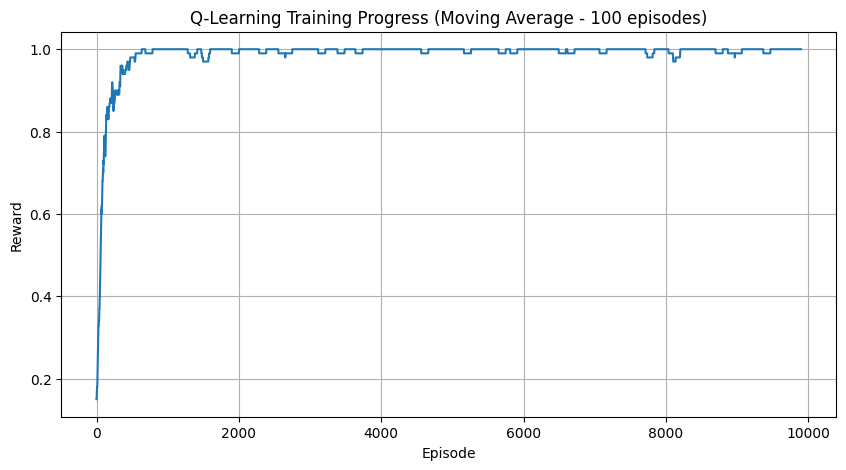

In [28]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title('Q-Learning Training Progress (Moving Average - 100 episodes)')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.grid(True)
plt.show()

In [29]:
# Print final Q-table
print("Final Q-table:")
print(q_table)

Final Q-table:
[[9.40412347e-01 9.50990050e-01 9.01453050e-01 9.39668210e-01]
 [9.36211278e-01 0.00000000e+00 3.26230246e-04 1.06783854e-01]
 [7.04878246e-02 3.22967943e-05 0.00000000e+00 0.00000000e+00]
 [3.26230246e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.49133275e-01 9.60596010e-01 0.00000000e+00 9.33844699e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.74523502e-01 0.00000000e+00 3.26230246e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.56475985e-01 9.70299000e-01 9.59672657e-01 9.48903406e-01]
 [4.18169443e-01 9.80073558e-01 2.39128261e-01 0.00000000e+00]
 [2.87504026e-01 9.85467630e-01 0.00000000e+00 1.48016545e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.67926077e-01 9.67898598e-01 9.80100000e-01 9.53818345e-01]
 [9.64287408e-01 9.78833194e-01 9.90000000e-01 9.66019029e-01]
 [9.79175730e-01 9.87184630e-01 1.00000000e+00 9.52801256e-01]
 [0.00000000e+00 0.00000000e+00 0.000000

In [38]:
def watch_agent():
    """Watch the trained agent in action"""
    # Create environment with rendering
    watch_env = gym.make('FrozenLake-v1', is_slippery=True, render_mode='human', 
                        desc=generate_random_map(
                            size=map_size
                        ))
    state, _ = watch_env.reset()
    state = int(state)
    done = False
    truncated = False
    
    while not (done or truncated):
        # Choose action with highest Q-value
        action = np.argmax(q_table[state])
        # Take action
        state, reward, done, truncated, _ = watch_env.step(action)
        state = int(state)

    watch_env.close()
    if reward > 0:
        print("Goal reached!")
    else:
        print("Failed to reach goal.")

# Uncomment to watch the agent perform
watch_agent()


Failed to reach goal.


In [21]:
env.close()